In [ ]:
# 🧠 STEP 1: Install YOLOv8
!pip install ultralytics --quiet
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # or yolov8s.pt, yolov8m.pt etc.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyti

100%|██████████| 6.25M/6.25M [00:00<00:00, 210MB/s]


In [ ]:
# 📤 STEP 1: Upload an Image with Vision Capabilities
from google.colab import files
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import PIL.Image
import io

# Function to process image from JS (webcam)
def js_to_image(js_reply):
    """Convert JS video frame to OpenCV image"""
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Function to detect and display (assumes model is defined elsewhere)
def detect_and_display(img):
    results = model(img, verbose=False)
    annotated = results[0].plot()
    rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    return PIL.Image.fromarray(rgb)

# Upload block
uploaded_file = files.upload()

if uploaded_file:
    for filename in uploaded_file.keys():
        print(f"Uploaded file: {filename}")
        image = PIL.Image.open(io.BytesIO(uploaded_file[filename]))

        # Convert to OpenCV format for processing
        img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        display(image)

        # Run detection if needed
        output_image = detect_and_display(img_cv)
        display(output_image)

# 📷 STEP 2: JavaScript to Capture Webcam and Send to Python
JS_CODE = """
async function captureFrame() {
  const video = document.createElement('video');
  const canvas = document.createElement('canvas');
  const context = canvas.getContext('2d');
  const stream = await navigator.mediaDevices.getUserMedia({video: true});
  video.srcObject = stream;
  await video.play();
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  context.drawImage(video, 0, 0);
  stream.getTracks().forEach(track => track.stop());
  return canvas.toDataURL('image/jpeg', 0.8);
}
captureFrame()
"""

# Optional: Capture from webcam
# js_reply = eval_js(JS_CODE)
# img_webcam = js_to_image(js_reply)
# display(detect_and_display(img_webcam))

In [ ]:
# 📷 STEP 2: JavaScript to Capture Webcam and Send to Python
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import PIL.Image

def js_to_image(js_reply):
    """Convert JS video frame to OpenCV image"""
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

def detect_and_display(img):
    results = model(img, verbose=False)
    annotated = results[0].plot()
    rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    return PIL.Image.fromarray(rgb)

# This JS block grabs webcam frames
JS_CODE = """
async function captureFrame() {
  const video = document.createElement('video');
  const canvas = document.createElement('canvas');
  const context = canvas.getContext('2d');
  const stream = await navigator.mediaDevices.getUserMedia({video: true});
  video.srcObject = stream;
  await video.play();
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  context.drawImage(video, 0, 0);
  stream.getTracks().forEach(track => track.stop());
  return canvas.toDataURL('image/jpeg', 0.8);
}
captureFrame()
"""


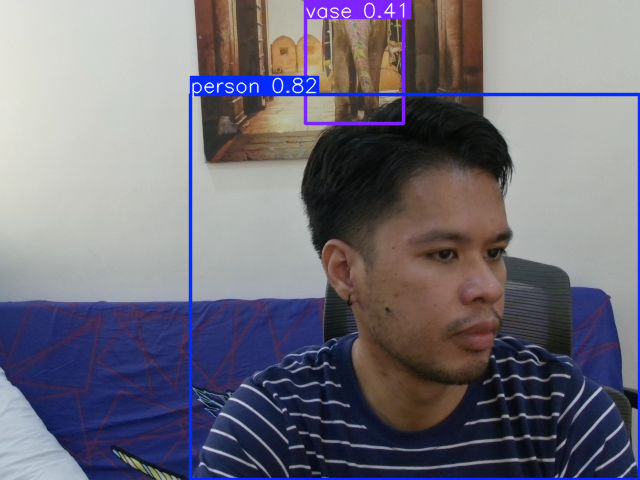

In [9]:
# ▶️ STEP 3: Capture One Frame & Run YOLO
from IPython.display import clear_output

for i in range(10):  # Capture 10 frames, change to your liking
    clear_output(wait=True)
    js_reply = eval_js(JS_CODE)
    frame = js_to_image(js_reply)
    img = detect_and_display(frame)
    display(img)


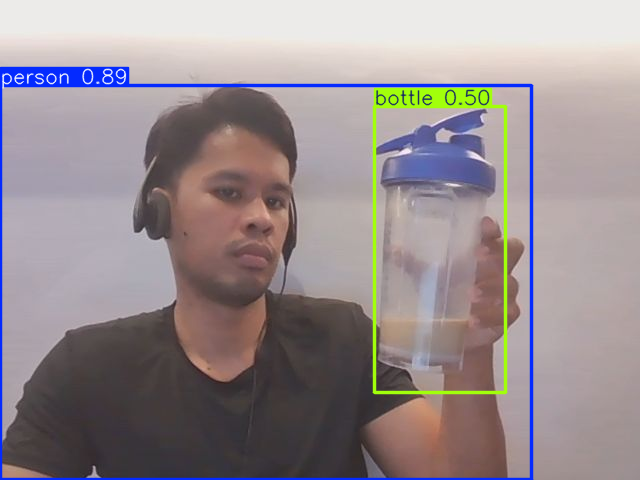

In [ ]:
# ▶️ STEP 3: Capture One Frame & Run YOLO
from IPython.display import clear_output

for i in range(10):  # Capture 10 frames, change to your liking
    clear_output(wait=True)
    js_reply = eval_js(JS_CODE)
    frame = js_to_image(js_reply)
    img = detect_and_display(frame)
    display(img)
